In [4]:
import pandas as pd

In [51]:
traffic = pd.read_csv("data_input/traffic.csv", parse_dates = ['Date'])
traffic.head()

,Date,Device Category,Browser,Total Visitors,Sessions,Bounce Rate
0,2019-06-01,desktop,Firefox,38,38,0.0000
1,2019-06-01,mobile,Android Webview,38,38,100.0000
2,2019-06-01,mobile,Chrome,77,77,49.3506
3,2019-06-01,desktop,Chrome,997,1073,24.9767
4,2019-06-01,desktop,Edge,115,115,66.9565


Q: Create a plot which shown `Total Visitors` growth from mobile device!

Hint:
* create a pivot table with date and device category as the index
* use pandas.dataframe.xs to slice only the mobile device
* use plot() afterwards

In [52]:
traffic_pivot = traffic.pivot_table(values='Total Visitors',
                   index=['Date', 'Device Category'])
traffic_pivot.head(10)

Total Visitors
Date       Device Category                
2019-06-01 desktop              314.909639
           mobile               477.708955
           tablet               115.878788
2019-06-02 desktop              305.611111
           mobile               741.898990
           tablet               131.892308
2019-06-03 desktop              744.178010
           mobile               695.792453
           tablet               115.870968
2019-06-04 desktop              908.735484

In [53]:
traffic_pivot = traffic_pivot.xs("mobile", level=1)
traffic_pivot.head(10)

,Total Visitors
Date,
2019-06-01,477.708955
2019-06-02,741.898990
2019-06-03,695.792453
2019-06-04,684.184211
2019-06-05,519.465909
2019-06-06,462.694118
2019-06-07,481.845588
2019-06-08,377.484277
2019-06-09,565.883495


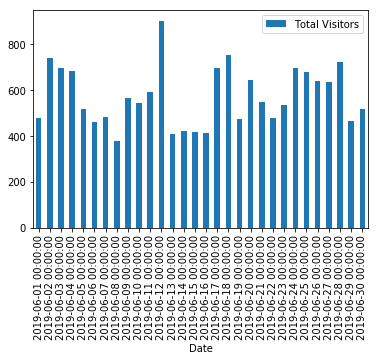

In [54]:
traffic_pivot.plot(kind='bar')

Q: During June, which date has the highest `Visitor Growth` for each desktop, mobile, and tablet?
    
_Hint_:
* Create new variable which stores `Visitor Growth` difference (diff)

In [55]:
traffic_device = traffic.pivot_table(values="Total Visitors", columns="Device Category", index="Date")
traffic_device.head(10)

Device Category,desktop,mobile,tablet
Date,,,
2019-06-01,314.909639,477.708955,115.878788
2019-06-02,305.611111,741.898990,131.892308
2019-06-03,744.178010,695.792453,115.870968
2019-06-04,908.735484,684.184211,64.477778
2019-06-05,788.664773,519.465909,128.896552
2019-06-06,699.555556,462.694118,85.135714
2019-06-07,790.964029,481.845588,103.160494
2019-06-08,215.206107,377.484277,232.000000
2019-06-09,235.914474,565.883495,75.846154


In [56]:
traffic_device[["diff_desktop", "diff_mobile", "diff_tablet"]] = traffic_device[["desktop", "mobile", "tablet"]].diff()

In [57]:
traffic_device.head(10)

Device Category,desktop,mobile,tablet,diff_desktop,diff_mobile,diff_tablet
Date,,,,,,
2019-06-01,314.909639,477.708955,115.878788,NaN,NaN,NaN
2019-06-02,305.611111,741.898990,131.892308,-9.298527,264.190035,16.013520
2019-06-03,744.178010,695.792453,115.870968,438.566899,-46.106537,-16.021340
2019-06-04,908.735484,684.184211,64.477778,164.557473,-11.608242,-51.393190
2019-06-05,788.664773,519.465909,128.896552,-120.070711,-164.718301,64.418774
2019-06-06,699.555556,462.694118,85.135714,-89.109217,-56.771791,-43.760837
2019-06-07,790.964029,481.845588,103.160494,91.408473,19.151471,18.024780
2019-06-08,215.206107,377.484277,232.000000,-575.757922,-104.361312,128.839506
2019-06-09,235.914474,565.883495,75.846154,20.708367,188.399218,-156.153846


In [58]:
traffic_device.sort_values("diff_desktop", ascending=False).head(1)

Device Category,desktop,mobile,tablet,diff_desktop,diff_mobile,diff_tablet
Date,,,,,,
2019-06-10,891.054054,546.373984,38.958333,655.13958,-19.509511,-36.887821


In [59]:
traffic_device.sort_values("diff_mobile", ascending=False).head(1)

Device Category,desktop,mobile,tablet,diff_desktop,diff_mobile,diff_tablet
Date,,,,,,
2019-06-12,734.807407,904.153846,60.125,-302.658694,310.078216,-1.988043


In [60]:
traffic_device.sort_values("diff_tablet", ascending=False).head(1)

Device Category,desktop,mobile,tablet,diff_desktop,diff_mobile,diff_tablet
Date,,,,,,
2019-06-08,215.206107,377.484277,232.0,-575.757922,-104.361312,128.839506
